In [30]:
# importing modules 
import tensorflow as tf 
import numpy as np 
from PIL import Image, ImageOps
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Activation 
import matplotlib.pyplot as plt 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
from PIL import Image


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data() 

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [22]:
classes = np.unique(y_train)

# Print the classes
print("Classes in the MNIST dataset:", classes)

# Check the shape of the datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# Get the unique classes in the dataset
classes = np.unique(y_train)

# Print the classes
print("Classes in the MNIST dataset:", classes)

Classes in the MNIST dataset: [0. 1.]
x_train shape: (60000, 28, 28)
y_train shape: (60000, 10)
Classes in the MNIST dataset: [0. 1.]


In [23]:
print("First 10 labels in y_train:", y_train[:10])


First 10 labels in y_train: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [3]:
# Cast the records into float values 
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

# normalize image pixel values by dividing 
# by 255 
gray_scale = 255
x_train /= gray_scale 
x_test /= gray_scale 


In [17]:
print("Feature matrix:", x_train.shape) 
print("Target matrix:", x_test.shape) 
print("Feature matrix:", y_train.shape) 
print("Target matrix:", y_test.shape) 


Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000, 10)
Target matrix: (10000, 10)


NameError: name 'mnist' is not defined

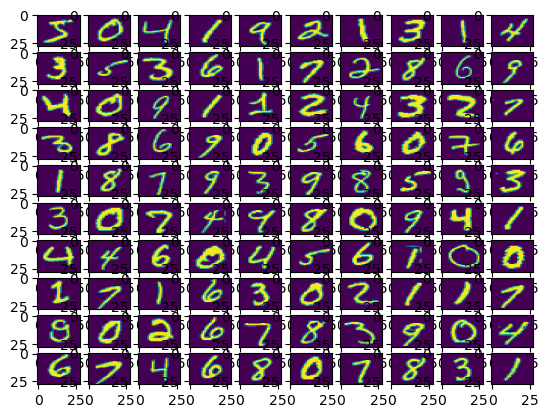

In [5]:
fig, ax = plt.subplots(10, 10) 
k = 0
for i in range(10): 
	for j in range(10): 
		ax[i][j].imshow(x_train[k].reshape(28, 28), 
						aspect='auto') 
		k += 1
plt.show() 


In [7]:
model = Sequential([ 
	
	# reshape 28 row * 28 column data to 28*28 rows 
	Flatten(input_shape=(28, 28)), 
	
	# dense layer 1 
	Dense(512, activation='sigmoid'), 
	
	# dense layer 2 
	Dense(256, activation='sigmoid'), 
	# dense layer 2 
	Dense(128, activation='sigmoid'),
	# output layer 
	Dense(10, activation='softmax'), 
]) 


In [8]:
#model.compile(optimizer='adam', 
#			loss='sparse_categorical_crossentropy', 
#			metrics=['accuracy']) 
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history =model.fit(x_train, y_train, epochs=30,
		batch_size=256, 
		validation_split=0.2) 


Epoch 1/30
188/188 [==============================] - 2s 10ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0988 - val_accuracy: 0.9793
Epoch 2/30
188/188 [==============================] - 2s 10ms/step - loss: 8.9514e-04 - accuracy: 0.9999 - val_loss: 0.0987 - val_accuracy: 0.9788
Epoch 3/30
188/188 [==============================] - 2s 10ms/step - loss: 9.0796e-04 - accuracy: 0.9999 - val_loss: 0.0994 - val_accuracy: 0.9788
Epoch 4/30
188/188 [==============================] - 2s 11ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.1137 - val_accuracy: 0.9762
Epoch 5/30
188/188 [==============================] - 2s 12ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.1269 - val_accuracy: 0.9732
Epoch 6/30
188/188 [==============================] - 2s 12ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.1203 - val_accuracy: 0.9762
Epoch 7/30
188/188 [==============================] - 2s 10ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.1082 - val_accuracy

test loss, test acc: [0.09577575325965881, 0.9830999970436096]


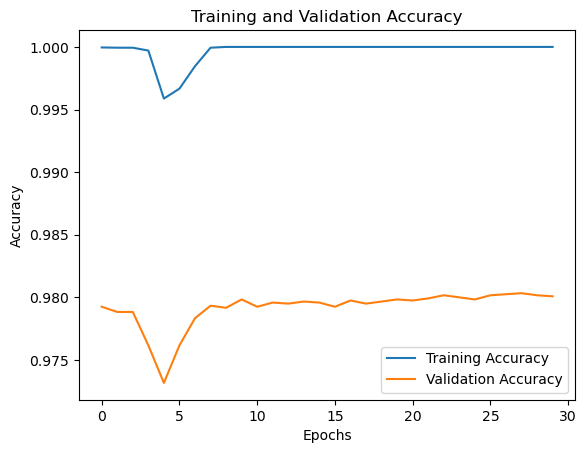

313/313 [==============================] - 1s 2ms/step - loss: 0.0958 - accuracy: 0.9831
Testing Accuracy: 0.9831


In [12]:
results = model.evaluate(x_test, y_test, verbose = 0) 
print('test loss, test acc:', results)


# Plot the validation accuracy during training

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Testing Accuracy: {test_accuracy:.4f}')


In [36]:
from PIL import Image, ImageOps
import numpy as np

# Load and preprocess the custom image
def load_and_preprocess_image(image_path):
    # Open the image file
    image = Image.open(image_path)
    
    # Convert image to grayscale
    image = image.convert('L')
    
    # Determine if the background is white
    # We assume the background color is the color of the top-left pixel
    top_left_pixel = image.getpixel((0, 0))
    
    # If the top-left pixel is white (255), invert the image
    if top_left_pixel > 200:  # You can adjust the threshold as needed
        image = ImageOps.invert(image)
    
    # Resize the image to 28x28 pixels
    image = image.resize((28, 28))
    
    # Convert image to numpy array
    image_array = np.array(image)
    
    # Normalize the pixel values to [0, 1]
    image_array = image_array.astype('float32') / 255.0
    
    # Reshape the array to match the input shape of the model (1, 28, 28)
    image_array = np.expand_dims(image_array, axis=0)
    
    return image_array

# Path to the custom image
image_path = 'g4.jpg'  # Update with the path to your image

# Preprocess the image
processed_image = load_and_preprocess_image(image_path)

# Make a prediction
predictions = model.predict(processed_image)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

print(f'Predicted class: {predicted_class[0]}')


1/1 [==============================] - 0s 20ms/step
Predicted class: 4


313/313 [==============================] - 1s 2ms/step


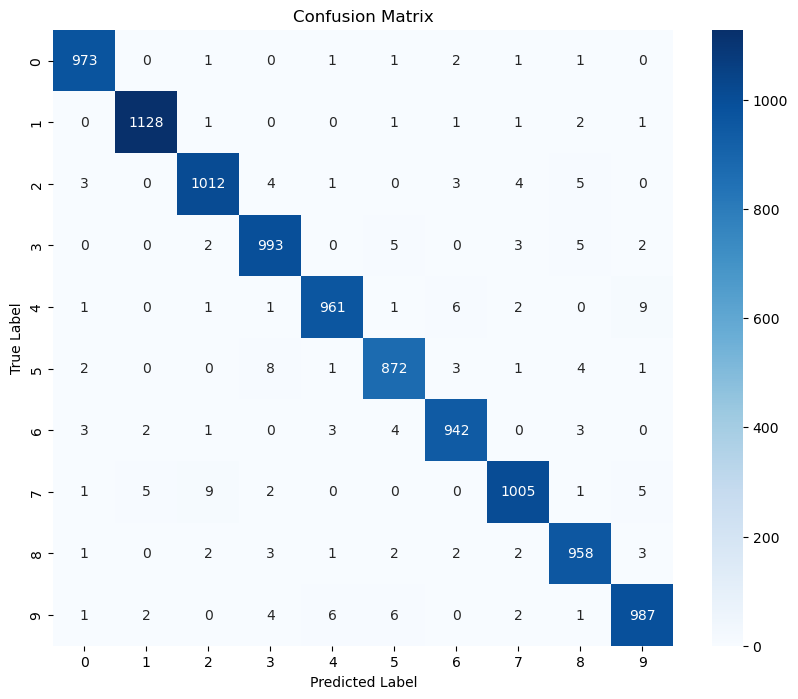

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make predictions on the test set
y_pred_prob = model.predict(x_test)

# Step 2: Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Convert y_test back from one-hot encoded to class labels
y_true = np.argmax(y_test, axis=1)

# Step 3: Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Step 4: Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
